In [19]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [1]:
pip install matplotlib

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
cd ..

/root/Artist-Classification


In [20]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import *

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

In [21]:
train_path = 'images/fullsplit/train'
valid_path = 'images/fullsplit/test'
test_path = 'images/fullsplit/val'

In [22]:
os.path.exists(train_path)

True

In [23]:
ls images/fullsplit/train

 André_Derain/     George_Condo/          Paul_Cézanne/
 Caravaggio/       Henri_Matisse/        'Pierre-Auguste Renoir'/
 Claude_Monet/     Keith_Haring/          Rembrant_Van_Rijn/
 Edouard_Manet/    Maurice_de_Vlaminck/   Takashi_Murakami/
 Francisco_Goya/   Michelangelo/          Van_Gogh/


In [45]:
classlist = ['André_Derain','Caravaggio','Claude_Monet','Edouard_Manet','Francisco_Goya','George_Condo','Henri_Matisse','Keith_Haring','Maurice_de_Vlaminck','Michelangelo','Paul_Cézanne','Pierre-Auguste Renoir','Rembrant_Van_Rijn','Takashi_Murakami','Van_Gogh']
batch_size = 10

In [25]:
AugmentGenerator = ImageDataGenerator(rescale = 1./255.,
                                      rotation_range = 40,
                                      width_shift_range = 0.2,
                                      height_shift_range = 0.2,
                                      shear_range = 0.2,
                                      zoom_range = 0.2,
                                      horizontal_flip = True)

aug_gen = AugmentGenerator.flow_from_directory(train_path,
                                                 target_size=(224, 224),
                                                 classes=classlist,
                                                 batch_size=batch_size)

train_gen = ImageDataGenerator(rescale = 1./255.).flow_from_directory(train_path,
                                                         target_size=(224, 224),
                                                         classes=classlist,
                                                         batch_size=batch_size)

valid_gen = ImageDataGenerator(rescale = 1./255.).flow_from_directory(valid_path,
                                                         target_size=(224, 224),
                                                         classes=classlist,
                                                         batch_size=batch_size)

test_gen = ImageDataGenerator(rescale = 1./255.).flow_from_directory(test_path,
                                                        target_size=(224, 224),
                                                        classes=classlist,
                                                        batch_size=batch_size)

Found 3123 images belonging to 15 classes.
Found 3123 images belonging to 15 classes.
Found 636 images belonging to 15 classes.
Found 410 images belonging to 15 classes.


In [46]:
train_batches =  ImageDataGenerator().flow_from_directory(train_path,
                                                          target_size=(224, 224),
                                                          classes=classlist,
                                                          batch_size=batch_size)

valid_batches = ImageDataGenerator().flow_from_directory(valid_path,
                                                         target_size=(224, 224),
                                                         classes=classlist,
                                                         batch_size=batch_size)

test_batches = ImageDataGenerator().flow_from_directory(test_path,
                                                        target_size=(224, 224),
                                                        classes=classlist,
                                                        batch_size=batch_size)

Found 3123 images belonging to 15 classes.
Found 636 images belonging to 15 classes.
Found 410 images belonging to 15 classes.


In [47]:
classlist = [string.replace('_', ' ') for string in classlist]

In [48]:
classlist

['André Derain',
 'Caravaggio',
 'Claude Monet',
 'Edouard Manet',
 'Francisco Goya',
 'George Condo',
 'Henri Matisse',
 'Keith Haring',
 'Maurice de Vlaminck',
 'Michelangelo',
 'Paul Cézanne',
 'Pierre-Auguste Renoir',
 'Rembrant Van Rijn',
 'Takashi Murakami',
 'Van Gogh']

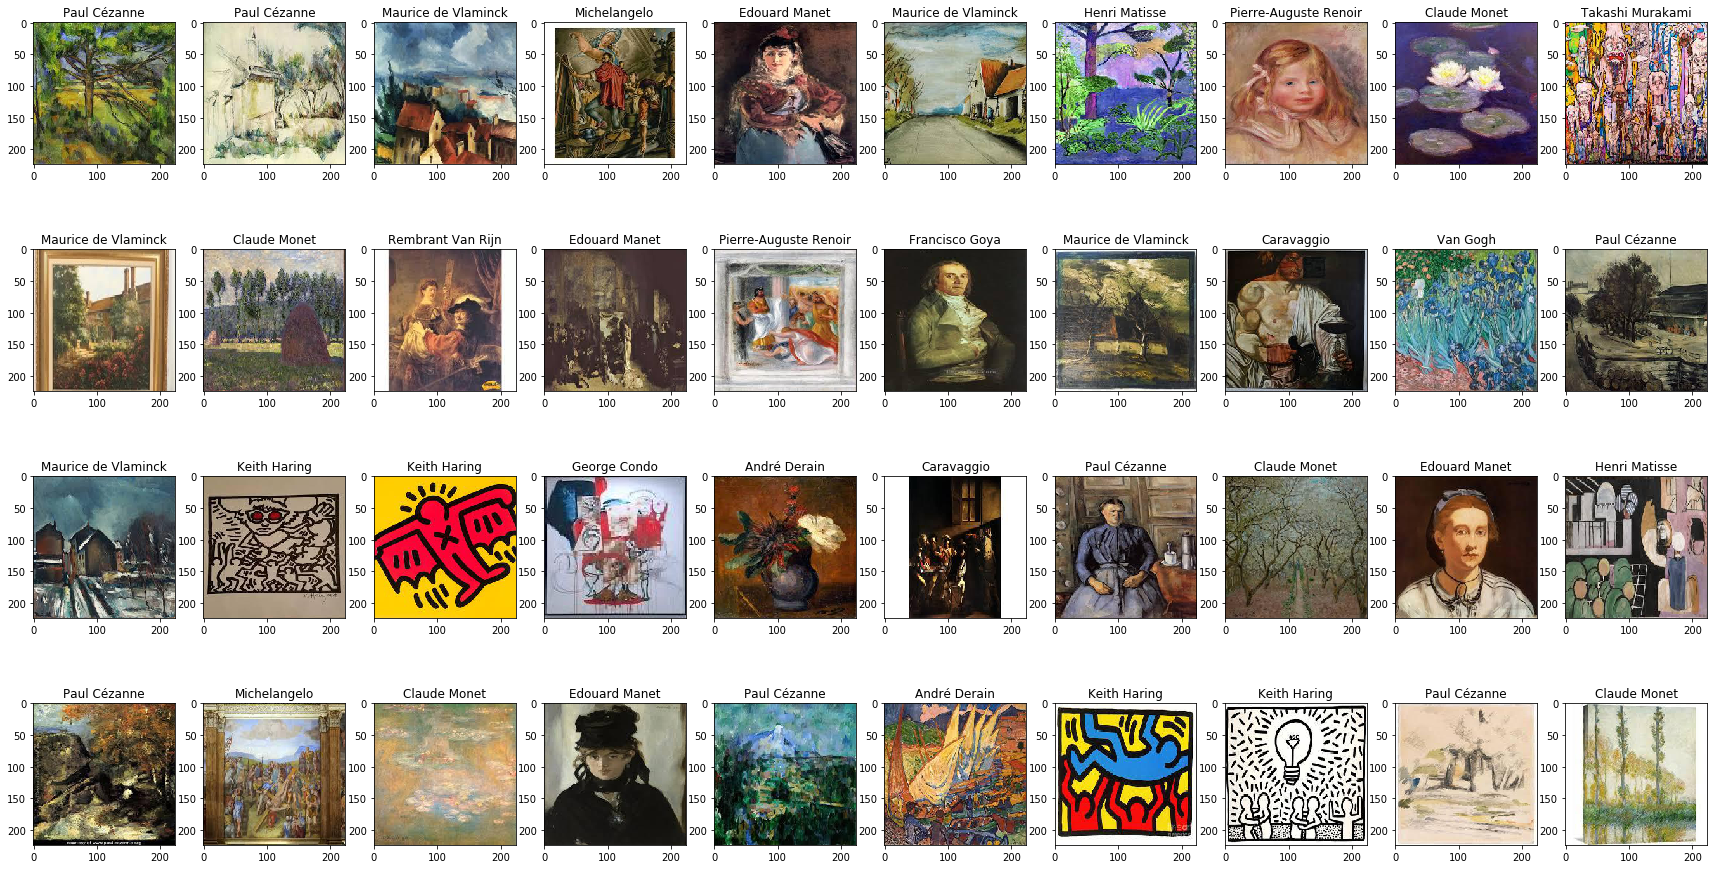

In [49]:
def image_plot(rows, batch, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        
        for j, pic in enumerate(images):
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(classlist[labels[j].argmax()],fontsize=12)
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(classlist[labels[j].argmax()],)  
    
image_plot(rows=4, batch=train_batches)

In [50]:
Modelx = load_model('Art15_Classifier_VGG19_model.h5')

In [12]:
from tensorflow.keras.applications.vgg19 import VGG19

In [13]:
vgg19_model = VGG19(input_shape = (224, 224, 3),
                    include_top = True,
                    weights = 'imagenet')

for layer in vgg19_model.layers[:]:
    layer.trainable = False

In [14]:
Modelx = Sequential()
for layer in vgg19_model.layers[:-1]:
    Modelx.add(layer)

num_classes = len(classlist)

Modelx.add(layers.Dense(1024, activation='relu'))

Modelx.add(layers.Dropout(0.25))

Modelx.add(layers.Dense(num_classes, activation='softmax'))

In [15]:
RMS =  tf.keras.optimizers.RMSprop(lr=0.0001)
SGD = tf.keras.optimizers.SGD(learning_rate=0.001)

Modelx.compile(optimizer = SGD,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [16]:
Modelx.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)       2

In [81]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10, restore_best_weights=True)
#mc = ModelCheckpoint('vgg19_model15_best.h5', monitor='val_loss', mode='min', save_best_only=True)

In [17]:
Modelx.fit(train_batches,
           validation_data=valid_batches,
           epochs=50,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/25
209/209 [==============================] - 27s 128ms/step - loss: 2.3118 - accuracy: 0.2805 - val_loss: 1.7875 - val_accuracy: 0.4167
Epoch 2/25
209/209 [==============================] - 22s 103ms/step - loss: 1.5255 - accuracy: 0.5117 - val_loss: 1.5495 - val_accuracy: 0.5016
Epoch 3/25
209/209 [==============================] - 22s 103ms/step - loss: 1.2538 - accuracy: 0.6010 - val_loss: 1.4747 - val_accuracy: 0.5362
Epoch 4/25
209/209 [==============================] - 22s 104ms/step - loss: 1.0880 - accuracy: 0.6577 - val_loss: 1.4131 - val_accuracy: 0.5519
Epoch 5/25
209/209 [==============================] - 22s 104ms/step - loss: 0.9666 - accuracy: 0.7064 - val_loss: 1.3658 - val_accuracy: 0.5550
Epoch 6/25
209/209 [==============================] - 22s 104ms/step - loss: 0.8755 - accuracy: 0.7474 - val_loss: 1.3256 - val_accuracy: 0.5723
Epoch 7/25
209/209 [==============================] - 22s 105ms/step - loss: 0.7918 - a

In [28]:
Modelx.fit(train_batches,
           validation_data=valid_batches,
           epochs=25,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/25
209/209 [==============================] - 22s 106ms/step - loss: 0.2295 - accuracy: 0.9811 - val_loss: 1.2601 - val_accuracy: 0.6195
Epoch 2/25
209/209 [==============================] - 22s 103ms/step - loss: 0.2192 - accuracy: 0.9801 - val_loss: 1.2623 - val_accuracy: 0.6101
Epoch 3/25
209/209 [==============================] - 22s 104ms/step - loss: 0.2093 - accuracy: 0.9817 - val_loss: 1.2649 - val_accuracy: 0.6195
Epoch 4/25
209/209 [==============================] - 22s 104ms/step - loss: 0.1995 - accuracy: 0.9850 - val_loss: 1.2630 - val_accuracy: 0.6148
Epoch 5/25
209/209 [==============================] - 22s 105ms/step - loss: 0.1912 - accuracy: 0.9846 - val_loss: 1.2642 - val_accuracy: 0.6226
Epoch 6/25
209/209 [==============================] - 23s 108ms/step - loss: 0.1825 - accuracy: 0.9872 - val_loss: 1.2665 - val_accuracy: 0.6069
Epoch 00006: early stopping


In [61]:
def image_plot_predict(rows, batch, model, cols=batch_size, classlist=classlist):   
    
    fig, axs = plt.subplots(rows,cols,figsize=(cols*3,rows*4))

    for i in range(rows):
        
        images, labels = next(batch)
        predictions = model.predict(images)
        
        for j, pic in enumerate(images):
            
            title = f"Pred {classlist[predictions[j].argmax()]} \nTrue {classlist[labels[j].argmax()]}"
            
            if rows > 1:
                axs[i,j].imshow(pic/255)
                axs[i,j].set_title(title,fontsize=12)
            
            else:
                axs[j].imshow(pic/255)
                axs[j].set_title(title,fontsize=12)

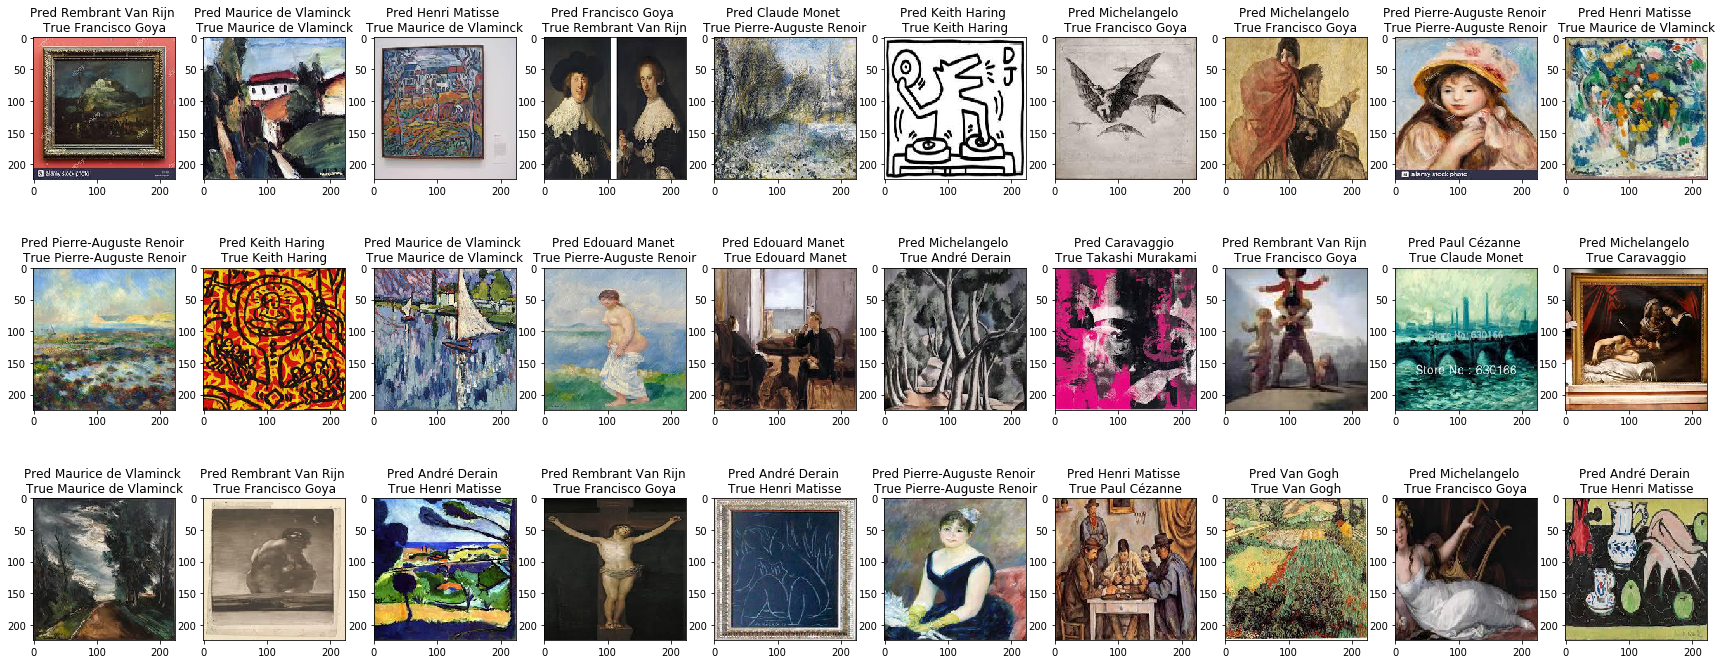

In [63]:
image_plot_predict(rows=3, batch=test_batches, model=Modelx)

In [64]:
def result(test_gen, model):
    pred_, actual_  = [], []  
    r = round(test_batches.n / test_batches.batch_size)

    for i in range(r+1):
        
        images, labels = next(test_gen)
        predictions = model.predict(images)
        
        for j, label in enumerate(labels):
            
            actual_.append(label.argmax())
            pred_.append(predictions[j].argmax())
            
    return pred_, actual_

In [65]:
test_batches.class_indices, test_batches.n

({'André_Derain': 0,
  'Caravaggio': 1,
  'Claude_Monet': 2,
  'Edouard_Manet': 3,
  'Francisco_Goya': 4,
  'George_Condo': 5,
  'Henri_Matisse': 6,
  'Keith_Haring': 7,
  'Maurice_de_Vlaminck': 8,
  'Michelangelo': 9,
  'Paul_Cézanne': 10,
  'Pierre-Auguste Renoir': 11,
  'Rembrant_Van_Rijn': 12,
  'Takashi_Murakami': 13,
  'Van_Gogh': 14},
 410)

In [66]:
pred, actual = result(test_batches, Modelx)

In [67]:
len(pred)

420

In [68]:
np.unique(actual)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

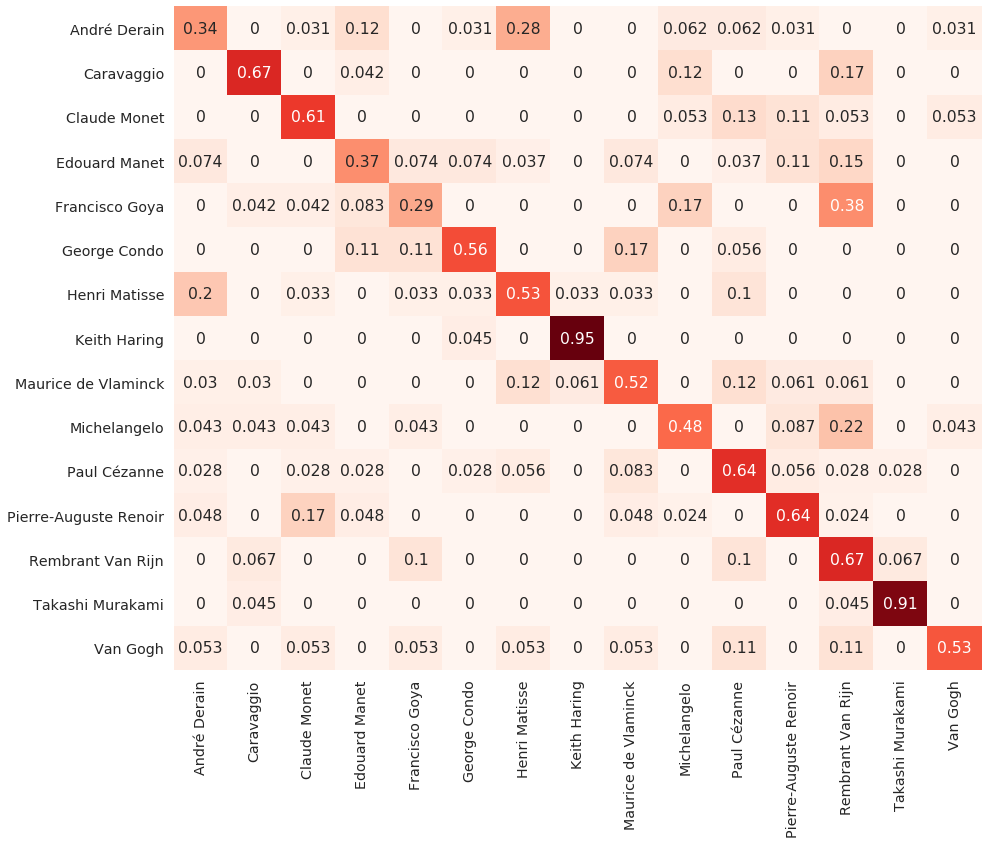

In [69]:
plt.figure(figsize=(14,12), tight_layout=True, frameon=True)

confusion = confusion_matrix(actual, pred, normalize='true')

sns.set(font_scale=1.3)

sns.heatmap(confusion, annot=True, yticklabels=classlist, xticklabels=classlist, cbar=False, cmap='Reds')

In [70]:
def missed(test_gen, model, classlist=classlist):

    wrong, ximages, correct = [], [], []
    r = round(test_gen.n / test_gen.batch_size)
    idx = 0
    
    for i in range(r):
    
        images, labels = next(test_gen)
        predictions = model.predict(images)
    
        for j, label in enumerate(labels):
            idx += 1
    
            actual_ = label.argmax()
            pred_ = predictions[j].argmax()    
    
            if actual_ != pred_:
                correct.append(classlist[actual_])
                wrong.append(classlist[pred_])
                ximages.append(images[j])
                
    return wrong, ximages, correct

In [71]:
wrong, ximages, correct = missed(test_batches, Modelx)

In [72]:
len(wrong), len(ximages), len(correct)

(172, 172, 172)

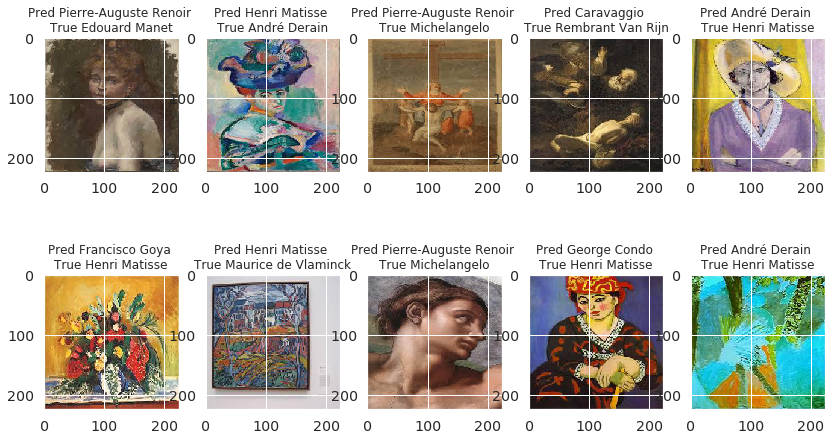

In [113]:
fig, axs = plt.subplots(2, 5, figsize=(14, 8))

#sns.set(font_scale=1)

k = 135
for i in range(2):
    for j in range(5):
        axs[i,j].imshow(ximages[k]/255)
        title = f"Pred {wrong[k]} \nTrue {correct[k]}"
        axs[i,j].set_title(title,fontsize=12)
        k+=1

In [48]:
from sklearn.metrics import classification_report

In [83]:
metrics = classification_report(np.array(actual),
                                np.array(pred),
                                labels = np.unique(actual),
                                target_names=classlist,
                                output_dict=True)

In [85]:
metrics_df = pd.DataFrame(metrics).T.iloc[:-3,:2]
metrics_df

precision    recall
André Derain            0.440000  0.343750
Caravaggio              0.727273  0.666667
Claude Monet            0.638889  0.605263
Edouard Manet           0.454545  0.370370
Francisco Goya          0.411765  0.291667
George Condo            0.625000  0.555556
Henri Matisse           0.484848  0.533333
Keith Haring            0.875000  0.954545
Maurice de Vlaminck     0.586207  0.515152
Michelangelo            0.478261  0.478261
Paul Cézanne            0.522727  0.638889
Pierre-Auguste Renoir   0.658537  0.642857
Rembrant Van Rijn       0.392157  0.666667
Takashi Murakami        0.869565  0.909091
Van Gogh                0.714286  0.526316

In [86]:
len(np.arange(0,27,2))

14

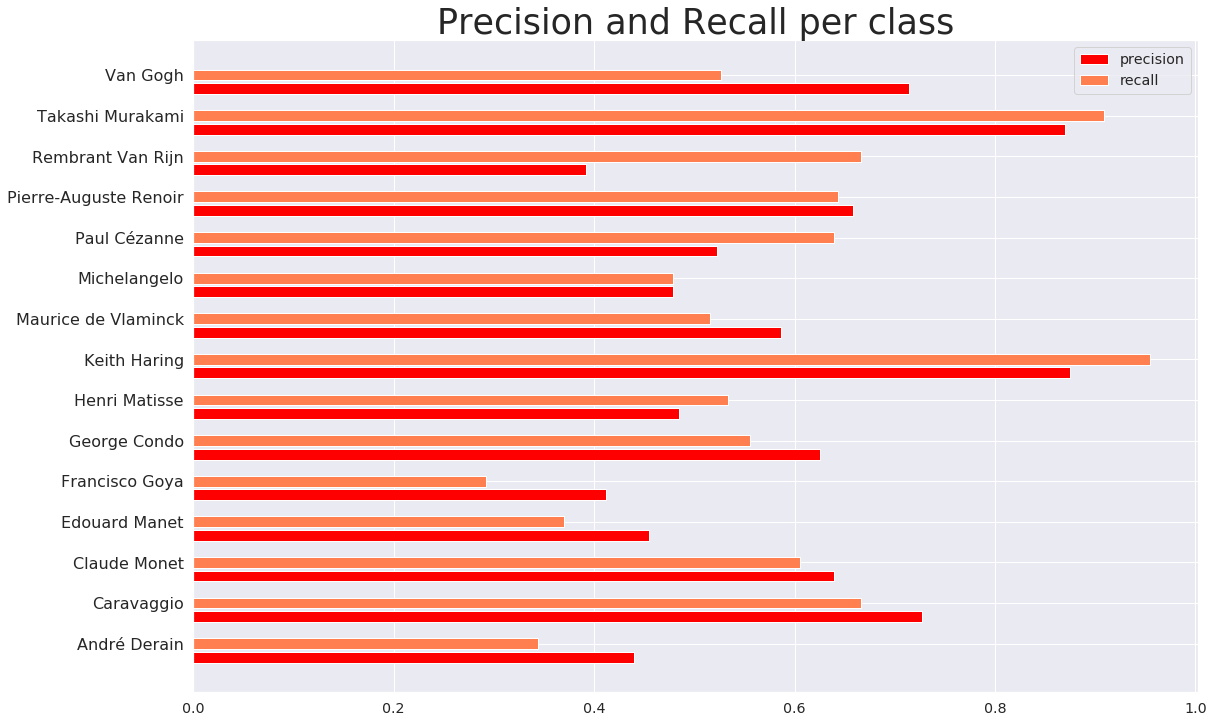

In [116]:
plt.figure(figsize=(18,12))
plt.barh(np.arange(0,44,3), metrics_df.precision, color='red')
plt.barh(np.arange(1,45,3), metrics_df.recall, color='coral')
plt.yticks(ticks=np.arange(1,45,3), labels=classlist, fontsize=16)
plt.title('Precision and Recall per class', fontsize=35, )
plt.legend(['precision','recall'])

In [78]:
Modelx.save('Art15_Classifier_VGG19_model.h5')

In [60]:
from tensorflow.keras.applications.vgg16 import VGG16

In [73]:
vgg16_model = VGG16(input_shape = (224, 224, 3),
                    include_top = False,
                    weights = 'imagenet')

for layer in vgg16_model.layers[:]:
    layer.trainable = False

In [74]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(vgg16_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)

# Add a dropout rate of 0.25
x = layers.Dropout(0.25)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(num_classes, activation='softmax')(x)

modely = tf.keras.models.Model(vgg16_model.input, x)

SGD = tf.keras.optimizers.SGD(learning_rate=0.001)

modely.compile(optimizer = SGD,
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

In [75]:
modely.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [76]:
modely.fit(train_batches,
           validation_data=valid_batches,
           epochs=50,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/50
209/209 [==============================] - 21s 101ms/step - loss: 6.9588 - accuracy: 0.2946 - val_loss: 2.3589 - val_accuracy: 0.4670
Epoch 2/50
209/209 [==============================] - 20s 98ms/step - loss: 1.3533 - accuracy: 0.6513 - val_loss: 1.8633 - val_accuracy: 0.5330
Epoch 3/50
209/209 [==============================] - 20s 97ms/step - loss: 0.6481 - accuracy: 0.8069 - val_loss: 1.7941 - val_accuracy: 0.5739
Epoch 4/50
209/209 [==============================] - 21s 99ms/step - loss: 0.3683 - accuracy: 0.8924 - val_loss: 1.7881 - val_accuracy: 0.5676
Epoch 5/50
209/209 [==============================] - 21s 99ms/step - loss: 0.2307 - accuracy: 0.9350 - val_loss: 1.8170 - val_accuracy: 0.5991
Epoch 6/50
209/209 [==============================] - 20s 97ms/step - loss: 0.1819 - accuracy: 0.9430 - val_loss: 1.8579 - val_accuracy: 0.5896
Epoch 7/50
209/209 [==============================] - 21s 98ms/step - loss: 0.1579 - accurac

In [77]:
Modelx.save('Art15_Classifier_VGG16_model.h5')

In [79]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step: 


In [80]:
for layer in base_model.layers:
    layer.trainable = False

In [82]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.1)(x)
x = layers.Dense(15, activation='softmax')(x)

modeli = tf.keras.models.Model(base_model.input, x)

modeli.compile(optimizer=RMS, loss='categorical_crossentropy', metrics= ['acc'])

In [83]:
modeli.fit(train_batches,
           validation_data=valid_batches,
           epochs=50,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/50
209/209 [==============================] - 26s 122ms/step - loss: 2.5590 - acc: 0.1732 - val_loss: 26.4318 - val_acc: 0.0975
Epoch 2/50
209/209 [==============================] - 21s 99ms/step - loss: 1.8117 - acc: 0.4598 - val_loss: 34.5324 - val_acc: 0.0991
Epoch 3/50
209/209 [==============================] - 21s 100ms/step - loss: 1.3246 - acc: 0.6366 - val_loss: 39.0489 - val_acc: 0.1038
Epoch 4/50
209/209 [==============================] - 21s 100ms/step - loss: 0.9738 - acc: 0.7608 - val_loss: 40.9532 - val_acc: 0.1006
Epoch 5/50
209/209 [==============================] - 21s 100ms/step - loss: 0.6954 - acc: 0.8575 - val_loss: 46.2713 - val_acc: 0.1038
Epoch 6/50
209/209 [==============================] - 21s 100ms/step - loss: 0.5087 - acc: 0.9167 - val_loss: 48.1782 - val_acc: 0.1022
Epoch 7/50
209/209 [==============================] - 21s 99ms/step - loss: 0.3712 - acc: 0.9561 - val_loss: 49.3702 - val_acc: 0.1069
Epoch 8

In [91]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape=(224, 224,3),
                      include_top=False,
                      weights="imagenet")

for layer in base_model.layers:
    layer.trainable = False

In [92]:
from tensorflow.keras.applications import ResNet50
#from tensorflow.python.keras.models import Sequential
#from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()

base_model.add(ResNet50(include_top=False,
                        weights='imagenet',
                        pooling='max'))

base_model.add(layers.Dense(15, activation='softmax'))

modelz.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['acc'])

In [89]:
modelz.fit(train_batches,
           validation_data=valid_batches,
           epochs=50,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/50
209/209 [==============================] - 24s 114ms/step - loss: 1.8265 - acc: 0.4598 - val_loss: 35.2453 - val_acc: 0.1038
Epoch 2/50
209/209 [==============================] - 21s 99ms/step - loss: 1.3218 - acc: 0.6308 - val_loss: 38.1233 - val_acc: 0.1101
Epoch 3/50
209/209 [==============================] - 21s 100ms/step - loss: 0.9694 - acc: 0.7663 - val_loss: 41.5019 - val_acc: 0.0975
Epoch 4/50
209/209 [==============================] - 21s 99ms/step - loss: 0.6949 - acc: 0.8581 - val_loss: 46.9827 - val_acc: 0.1148
Epoch 5/50
209/209 [==============================] - 21s 98ms/step - loss: 0.5137 - acc: 0.9164 - val_loss: 48.1342 - val_acc: 0.0959
Epoch 6/50
209/209 [==============================] - 21s 100ms/step - loss: 0.3733 - acc: 0.9584 - val_loss: 51.7481 - val_acc: 0.0943
Epoch 7/50
209/209 [==============================] - 21s 100ms/step - loss: 0.2886 - acc: 0.9773 - val_loss: 54.4118 - val_acc: 0.1069
Epoch 8/

In [94]:
#pip install -U efficientnet

     |████████████████████████████████| 12.4 MB 22.5 MB/s eta 0:00:01
     |████████████████████████████████| 3.3 MB 115.6 MB/s eta 0:00:01
     |████████████████████████████████| 148 kB 104.2 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 96.1 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 113.9 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [113]:
#pip install -U --pre efficientnet

Requirement already up-to-date: efficientnet in /usr/local/lib/python3.6/dist-packages (1.1.1)
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [159]:
from efficientnet.tfkeras import EfficientNetB7 as Net

In [160]:
base_model = Net(input_shape = (224, 224, 3),
                                include_top = False,
                                weights = 'imagenet')

In [161]:
for layer in base_model.layers:
    layer.trainable = False

In [162]:
modele = Sequential()

modele.add(base_model)

modele.add(layers.GlobalMaxPooling2D(name="gap"))

modele.add(layers.Dropout(0.2, name="dropout_out"))

modele.add(layers.Dense(15, activation="softmax", name="fc_out"))

modele.compile(optimizer=RMS, loss='categorical_crossentropy', metrics=['acc'])

In [173]:
modele.fit(aug_gen,
           validation_data=valid_gen,
           epochs=100,
           verbose=1,
           callbacks=[es],
           workers=-1,
           use_multiprocessing=True)

  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


  ...
    to  
  ['...']


Train for 209 steps, validate for 43 steps
Epoch 1/100
209/209 [==============================] - 54s 259ms/step - loss: 2.0218 - acc: 0.4147 - val_loss: 1.5102 - val_acc: 0.5189
Epoch 2/100
209/209 [==============================] - 54s 259ms/step - loss: 2.0022 - acc: 0.4143 - val_loss: 1.3963 - val_acc: 0.5645
Epoch 3/100
209/209 [==============================] - 54s 260ms/step - loss: 2.0082 - acc: 0.4150 - val_loss: 1.4130 - val_acc: 0.5519
Epoch 4/100
209/209 [==============================] - 54s 259ms/step - loss: 2.0355 - acc: 0.4156 - val_loss: 1.4565 - val_acc: 0.5362
Epoch 5/100
209/209 [==============================] - 54s 261ms/step - loss: 1.9843 - acc: 0.4252 - val_loss: 1.4103 - val_acc: 0.5487
Epoch 6/100
209/209 [==============================] - 54s 258ms/step - loss: 1.9581 - acc: 0.4246 - val_loss: 1.5137 - val_acc: 0.5425
Epoch 7/100
209/209 [==============================] - 54s 258ms/step - loss: 1.9121 - acc: 0.4304 - val_loss: 1.4196 - val_acc: 0.5582
Epoch

In [174]:
Modelx.save('Art15_Classifier_ENet7_model.h5')